In [ ]:
import pandas as pd
import numpy as np
#import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
news_df=pd.read_csv("flipitnews-data.csv")

In [ ]:
news_df

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,Business,cars pull down us retail figures us retail sal...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...
2222,Entertainment,rem announce new glasgow concert us band rem h...
2223,Politics,how political squabbles snowball it s become c...


In [ ]:
print("Before pre processing, article look like this")
print()
news_df['Article'][0]

Before pre processing, article look like this



'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

## Data Exploration

In [ ]:
print("Shape of data is: ",news_df.shape)


Shape of data is:  (2225, 2)


In [ ]:
news_df.describe()

,Category,Article
count,2225,2225
unique,5,2126
top,Sports,kennedy questions trust of blair lib dem leade...
freq,511,2


In [ ]:
news_df.isna().sum()

Category    0
Article     0
dtype: int64

Category-wise count of articles

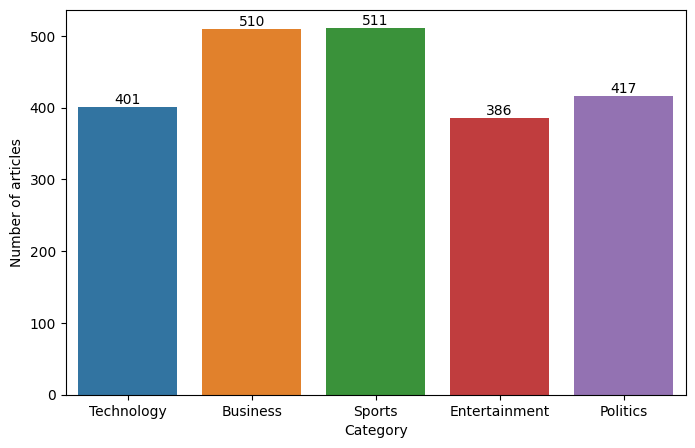

In [ ]:
plt.figure(figsize=(8,5))
fig=sns.countplot(x="Category",data=news_df)
fig.bar_label(fig.containers[0])
fig.set_xlabel("Category")
fig.set_ylabel("Number of articles")
plt.show()

## Text pre-processing

In [ ]:
stop_words=list(stopwords.words('english'))
def sentence_preprocess(sentence):
  sentence=re.sub('[^a-zA-z]',' ',sentence)   # remove non alphabets
  words=nltk.word_tokenize(sentence)          # tokenization
  cleaned_words=[word for word in words if not word in stop_words]    #removing stopwords
  lemma=WordNetLemmatizer()
  new_text=" ".join([lemma.lemmatize(word) for word in cleaned_words])  #lemmatization
  return new_text
news_df['Article']=news_df['Article'].apply(sentence_preprocess)


In [ ]:
print("After pre processing, article look like this")
print()
news_df['Article'][0]

After pre processing, article look like this



'tv future hand viewer home theatre system plasma high definition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talked technology ce digital personal video recorder dvr pvr set top box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also built high definition tv set big business japan u slower take europe lack high definition programming people forward wind advert also forget abiding network channel schedule putting together la carte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty channel 

Ordinal Encoding

In [ ]:
encode=ce.OrdinalEncoder(cols='Category')
news_df=encode.fit_transform(news_df)

In [ ]:
news_df

,Category,Article
0,1,tv future hand viewer home theatre system plas...
1,2,worldcom bos left book alone former worldcom b...
2,3,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle fa cup premiership side...
4,4,ocean twelve raid box office ocean twelve crim...
...,...,...
2220,2,car pull u retail figure u retail sale fell ja...
2221,5,kilroy unveils immigration policy ex chatshow ...
2222,4,rem announce new glasgow concert u band rem an...
2223,5,political squabble snowball become commonplace...


**Label encoded values**
1. Technology
2. Business
3. Sports
4. Entertainment
5. Politics

Bag of Words TF-IDF

In [ ]:
choice = int(input("Choose: \n 1. Bag of Words \n 2. TF-IDF \n"))
if choice == 1:
  cv=CountVectorizer(max_features=5000)
  X=cv.fit_transform(news_df.Article).toarray()
  Y=np.array(news_df['Category'].values)
elif choice == 2:
  tf_idf=TfidfVectorizer()
  X=tf_idf.fit_transform(news_df.Article).toarray()
  y=np.array(news_df['Category'].values)
else:
  print('wrong input')


Choose: 
 1. Bag of Words 
 2. TF-IDF 
2


Train Test Split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y,random_state=42)

print("Shape of train data is: ",X_train.shape)
print("Shape of test data is: ",X_test.shape)

Shape of train data is:  (1557, 24718)
Shape of test data is:  (668, 24718)


## Naive Bayes Classifier

In [ ]:
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nb_train=accuracy_score(y_train,nb.predict(X_train))
nb_test=accuracy_score(y_test,nb.predict(X_test))
print("Training accuracy: ",nb_train.round(3))
print("Testing accuracy: ",nb_test.round(3))

Training accuracy:  0.988
Testing accuracy:  0.97


In [ ]:
#Making Prediction and computing ROC-AUC score
y_pred_NB=nb.predict(X_test)
y_pred_proba=nb.predict_proba(X_test)
rocauc_score= roc_auc_score(y_test,y_pred_proba,multi_class="ovr")
print("ROC AUC score: ",rocauc_score.round(3))

ROC AUC score:  0.999


In [ ]:
precision=precision_score(y_test,y_pred_NB,average='weighted')
recall=recall_score(y_test,y_pred_NB,average='weighted')
f1=f1_score(y_test,y_pred_NB,average='weighted')
print("Precision score: ",precision.round(3))
print("Recall score: ",recall.round(3))
print("f1 score: ",f1.round(3))

Precision score:  0.971
Recall score:  0.97
f1 score:  0.97


Confusion Matrix

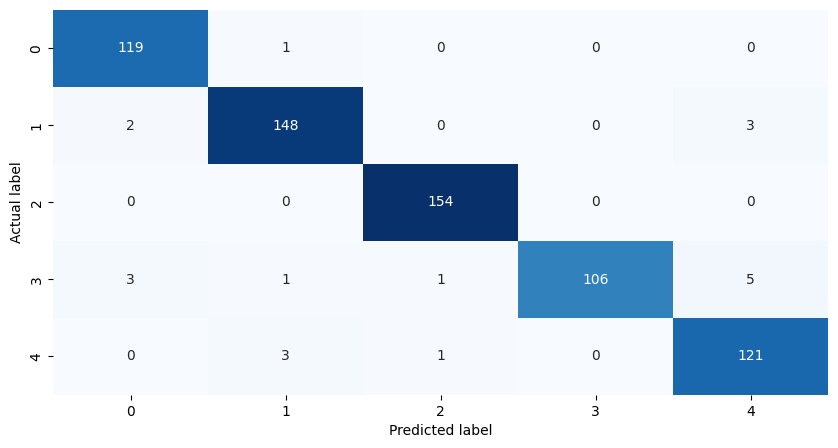

In [ ]:
confusion=confusion_matrix(y_test,y_pred_NB)
plt.figure(figsize=(10,5))
sns.heatmap(confusion,annot=True,fmt='d',cbar=False,cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       120
           2       0.97      0.97      0.97       153
           3       0.99      1.00      0.99       154
           4       1.00      0.91      0.95       116
           5       0.94      0.97      0.95       125

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



## **Generalised function for model**

Model training

In [ ]:
def model_training(model):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  y_pred_proba=model.predict_proba(X_test)
  return y_pred,y_pred_proba


Model Evaluation

In [ ]:
def evaluate_model(model,y_pred,y_pred_proba):

  #Calculating train and test accuracy
  train_acc=accuracy_score(y_train,model.predict(X_train))
  test_acc=accuracy_score(y_test,model.predict(X_test))
  print("Training accuracy: ",train_acc.round(3))
  print("Testing accuracy: ",test_acc.round(3))

  #computing ROC AUC score
  rocauc_score= roc_auc_score(y_test,y_pred_proba,multi_class="ovr")
  print("ROC AUC score: ",rocauc_score.round(3))

  #calculating precision,recall,f1score
  precision=precision_score(y_test,y_pred,average='weighted')
  recall=recall_score(y_test,y_pred,average='weighted')
  f1=f1_score(y_test,y_pred,average='weighted')
  print("Precision score: ",precision.round(3))
  print("Recall score: ",recall.round(3))
  print("f1 score: ",f1.round(3))
  print()

Decision Tree Classifier

In [ ]:
dt=DecisionTreeClassifier()

#model training
y_pred_dt,y_pred_proba_dt=model_training(dt)

#model evaluation
evaluate_model(dt,y_pred_dt,y_pred_proba_dt)

Training accuracy:  1.0
Testing accuracy:  0.847
ROC AUC score:  0.901
Precision score:  0.851
Recall score:  0.847
f1 score:  0.847



K Nearest Neighbours Classifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

#model training
y_pred_knn,y_pred_proba_knn=model_training(knn)

#model evaluation
evaluate_model(knn,y_pred_knn,y_pred_proba_knn)

Training accuracy:  0.963
Testing accuracy:  0.931
ROC AUC score:  0.989
Precision score:  0.933
Recall score:  0.931
f1 score:  0.931



Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()

#model training
y_pred_rf,y_pred_proba_rf=model_training(rf)

#model evaluation
evaluate_model(rf,y_pred_rf,y_pred_proba_rf)

Training accuracy:  1.0
Testing accuracy:  0.972
ROC AUC score:  0.997
Precision score:  0.972
Recall score:  0.972
f1 score:  0.972



***From the above 4 models tested, Naive Bayes Classifier seems to be the best performing model. It provides better training and testing accuracy as well as excellent scores for precision, recall and f1 score.***